# [ProDS Asso] Set2

In [1]:
import pandas as pd
import numpy as np

In [2]:
# =============================================================================
# 데이터 읽기 및 데이터 타입 확인
# =============================================================================

dat2=pd.read_csv("dataset/Dataset_17.csv")
dat2.dtypes


dat2.columns.values
# ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation',
#  'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
#  'Product_Category', 'Purchase', 'Type']

dat2.Age.value_counts()

Age
26-35    184510
36-45     95036
18-25     83542
46-50     38522
51-55     32473
55+       17809
0-17      13450
Name: count, dtype: int64

## Q1

<Axes: xlabel='City_Category', ylabel='Purchase'>

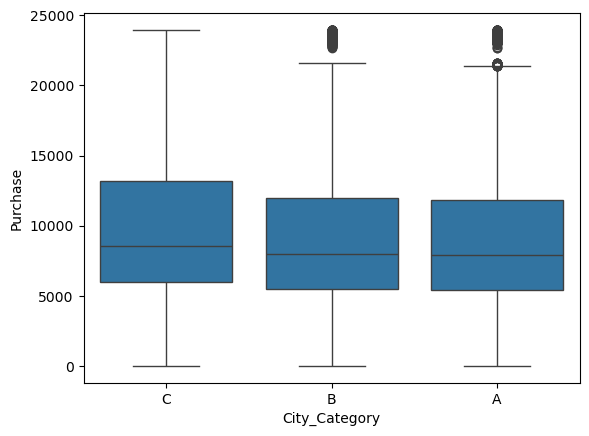

In [3]:
q1 = dat2.copy()


import seaborn as sns

sns.boxplot(data=q1, y='Purchase', x='City_Category')

In [4]:
q1_tab=q1.groupby('City_Category')['Purchase'].median()

abs(q1_tab.max() - q1_tab.min())

# 답: 651

651.0

## Q2

In [5]:
import numpy as np
import scipy
import scipy.stats

from scipy.stats import ttest_ind

q2=pd.pivot_table(dat2, index='User_ID',columns='Age',
                  values='Purchase', aggfunc='sum')


q2_45=q2['46-50'].dropna()
q2_51=q2['51-55'].dropna()


## default 등분산 가정
out1=ttest_ind(q2_45, q2_51, equal_var=True)
np.trunc(out1.pvalue*1000)/1000


# 답: 0.769

0.769

In [8]:
dat2.User_ID.value_counts()

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1004991       7
1005391       7
1005608       7
1000708       6
Name: count, Length: 4982, dtype: int64

In [9]:
q2

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
User_ID,,,,,,,
1000001,334093.0,NaN,NaN,NaN,NaN,NaN,NaN
1000003,NaN,NaN,341635.0,NaN,NaN,NaN,NaN
1000004,NaN,NaN,NaN,NaN,206468.0,NaN,NaN
1000005,NaN,NaN,821001.0,NaN,NaN,NaN,NaN
1000006,NaN,NaN,NaN,NaN,NaN,379930.0,NaN
...,...,...,...,...,...,...,...
1006033,NaN,NaN,NaN,NaN,NaN,501843.0,NaN
1006034,NaN,NaN,197086.0,NaN,NaN,NaN,NaN
1006035,NaN,NaN,956645.0,NaN,NaN,NaN,NaN


## Q3

In [6]:
q3=dat2.copy()


q3['VIP'].value_counts()

train=q3[q3.Type == 'train']
test=q3[q3.Type == 'test']

train.columns

var_list= ['Gender', 'City_Category_B', 'City_Category_C',
  'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4',
  'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8',
  'Occupation_9', 'Occupation_10', 'Occupation_11', 'Occupation_12',
  'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16',
  'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20',
  'Marital_Status']


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix

logit=LogisticRegression(random_state=123, solver='newton-cg', C=100000)
logit.fit(train[var_list],train['VIP'])

pred=logit.predict(test[var_list])

round(recall_score(test['VIP'], pred, pos_label=1),2)


# 답: 0.98

0.98

In [7]:
confusion_matrix(test['VIP'], pred)

array([[  2259,  23025],
       [  1890, 112336]], dtype=int64)

In [10]:
dat2.City_Category.value_counts()

City_Category
B    196563
C    143378
A    125401
Name: count, dtype: int64

In [12]:
pd.get_dummies(dat2.iloc[:,:5], columns=['City_Category'])

,User_ID,Product_ID,Gender,Age,City_Category_A,City_Category_B,City_Category_C
0,1004918,P00251242,0,18-25,False,False,True
1,1004918,P00216342,0,18-25,False,False,True
2,1004918,P00154042,0,18-25,False,False,True
3,1004918,P00065442,0,18-25,False,False,True
4,1004918,P00343042,0,18-25,False,False,True
...,...,...,...,...,...,...,...
465337,1000761,P00350442,1,18-25,False,False,True
465338,1000761,P00372445,1,18-25,False,False,True
465339,1000761,P00057642,1,18-25,False,False,True
465340,1000761,P00293242,1,18-25,False,False,True


In [13]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
onehot=OneHotEncoder(sparse_output=False).fit(dat2[['City_Category']])

In [22]:
onehot1=onehot.transform(dat2[['City_Category']])

In [23]:
print(onehot1)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
